# Cyber Security Paper

DOS Attacks - Denial of Service Attacks

# Key steps: 

- 1. Data Acquisition
- 2. Data Splitting
- 3. PyCaret Setup
- 4. Model Comparison
- 5. Model Creation and Tuning
- 6. Evaluation
- 7. Model Finalization and Saving
- 8. Visualization
- 9. Model Testing
- 10. Fernet algorithm for Encryption and Decryption

# Data Acquisition

In [55]:
import pandas as pd

load dataset

In [56]:
df = pd.read_csv(r"dataset\combined_dataset.csv")
df.head()

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,A1,A2,tot_kbps,label
0,10086,2,167772161,167772167,113850,121364100,252,911000000,2.530000e+11,3,...,1,2,4221,243018786,0,2601.0,0,0,2601.0,0
1,11575,4,167772173,167772168,93742,97679164,300,869000000,3.010000e+11,5,...,1,4,3735,3413,0,0.0,0,0,0.0,1
2,11485,4,167772180,167772168,97480,101574160,310,754000000,3.110000e+11,6,...,1,1,3795,1242,0,0.0,0,0,0.0,1
3,31993,7,167772161,167772175,129224,7494992,499,778000000,5.000000e+11,3,...,8,3,457026091,34127977,52,56.0,0,0,108.0,0
4,7057,4,167772167,167772161,86142,5686080,294,316000000,2.940000e+11,11,...,8,4,8839901,119929163,407,3751.0,0,0,4158.0,1


# Data Splitting

We should split the dataset into training and testing sets. 

This will allow us to evaluate the performance of our models on unseen data.

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
X = df.drop('label', axis=1)
y = df['label']

split dataset for 80% training and 20% testing

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
X_train.shape , X_test.shape

((83476, 24), (20869, 24))

Opps! 

classse are imbalanced!

so we use `fix_imbalance` parameter within the setup function of PyCaret

This will `automatically balance` the classes in your training data using SMOTE

# PyCaret environment setup

Initialize the PyCaret environment to choose the best model

Install PyCaret and Dependencies

!pip install pycaret scikit-learn pandas

In [60]:
from pycaret.classification import *

In [61]:
clf1 = setup(df, target='label', session_id=123, fix_imbalance=True)
print(clf1)

,Description,Value
0,Session id,123
1,Target,label
2,Target type,Binary
3,Original data shape,"(104345, 25)"
4,Transformed data shape,"(120288, 25)"
5,Transformed train set shape,"(88984, 25)"
6,Transformed test set shape,"(31304, 25)"
7,Numeric features,24
8,Rows with missing values,0.5%
9,Preprocess,True


# Model Comparison and Select the Best

Use compare_models() to compare multiple machine learning models and select the best one based on performance metrics.

In [62]:
best_model = compare_models()
print(best_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,12.7960
lightgbm,Light Gradient Boosting Machine,1.0000,1.0000,1.0000,0.9999,0.9999,0.9999,0.9999,3.9930
rf,Random Forest Classifier,0.9999,1.0000,1.0000,0.9998,0.9999,0.9999,0.9999,6.8810
dt,Decision Tree Classifier,0.9997,0.9997,0.9998,0.9995,0.9996,0.9994,0.9994,3.7600
et,Extra Trees Classifier,0.9992,1.0000,0.9993,0.9988,0.9990,0.9984,0.9984,5.5290
gbc,Gradient Boosting Classifier,0.9947,1.0000,0.9985,0.9881,0.9932,0.9889,0.9889,21.4370
ada,Ada Boost Classifier,0.9942,0.9999,0.9968,0.9885,0.9926,0.9878,0.9879,6.6500
knn,K Neighbors Classifier,0.8851,0.9448,0.8615,0.8473,0.8543,0.7595,0.7596,8.4380
ridge,Ridge Classifier,0.7489,0.8280,0.7603,0.6538,0.7030,0.4877,0.4919,2.7270
lda,Linear Discriminant Analysis,0.7489,0.8280,0.7603,0.6538,0.7031,0.4877,0.4919,2.9880


XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              objective='binary:logistic', predictor=None, ...)


# Model Creation and Tuning

We create specific models (Random Forest and Decision Tree) and tune their hyperparameters.

You can create model directly using create_model()

In [63]:
rf_model = create_model('rf')
rf_model

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9999,1.0000,1.0000,0.9996,0.9998,0.9997,0.9997
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9996,1.0000,1.0000,0.9990,0.9995,0.9991,0.9991
4,0.9999,1.0000,1.0000,0.9996,0.9998,0.9997,0.9997
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=123, verbose=0,
                       warm_start=False)

In [64]:
dt_model = create_model('dt')
dt_model

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9997,0.9996,0.9993,1.0000,0.9996,0.9994,0.9994
1,0.9999,0.9999,1.0000,0.9996,0.9998,0.9997,0.9997
2,0.9999,0.9999,1.0000,0.9996,0.9998,0.9997,0.9997
3,0.9995,0.9996,1.0000,0.9986,0.9993,0.9989,0.9989
4,0.9999,0.9999,1.0000,0.9996,0.9998,0.9997,0.9997
5,0.9999,0.9999,1.0000,0.9996,0.9998,0.9997,0.9997
6,0.9995,0.9994,0.9993,0.9993,0.9993,0.9988,0.9988
7,0.9995,0.9994,0.9989,0.9996,0.9993,0.9988,0.9988
8,0.9997,0.9998,1.0000,0.9993,0.9996,0.9994,0.9994


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=123, splitter='best')

Tune hyperparameters for optimal performance

In [65]:
rf_tuned_model = tune_model(rf_model)
rf_tuned_model

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9807,0.9933,0.9958,0.9566,0.9758,0.9598,0.9603
1,0.9799,0.9931,0.9968,0.9537,0.9748,0.9581,0.9587
2,0.9829,0.9939,0.9993,0.9587,0.9786,0.9643,0.9649
3,0.9822,0.9928,0.9979,0.9583,0.9777,0.9629,0.9634
4,0.9812,0.9918,0.9989,0.9551,0.9765,0.9609,0.9616
5,0.9817,0.9926,0.9975,0.9573,0.9770,0.9618,0.9623
6,0.9848,0.9947,0.9989,0.9635,0.9809,0.9683,0.9687
7,0.9803,0.9942,0.9951,0.9562,0.9753,0.9589,0.9594
8,0.9818,0.9929,0.9982,0.9570,0.9772,0.9621,0.9626


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=123, verbose=0,
                       warm_start=False)

In [66]:
dt_tuned_model = tune_model(dt_model)
dt_tuned_model

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9789,0.9945,0.9828,0.9639,0.9733,0.9559,0.9560
1,0.9897,0.9971,0.9912,0.9826,0.9869,0.9785,0.9785
2,0.9907,0.9971,0.9909,0.9854,0.9881,0.9805,0.9805
3,0.9889,0.9969,0.9905,0.9813,0.9859,0.9768,0.9768
4,0.9923,0.9978,0.9933,0.9871,0.9902,0.9839,0.9839
5,0.9953,0.9983,0.9958,0.9923,0.9941,0.9902,0.9902
6,0.9911,0.9985,0.9898,0.9874,0.9886,0.9813,0.9813
7,0.9873,0.9974,0.9909,0.9769,0.9838,0.9733,0.9734
8,0.9910,0.9978,0.9881,0.9888,0.9884,0.9810,0.9810


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=123, splitter='best')

# Evaluation

Evaluate model performance

In [67]:
evaluate_model(rf_tuned_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

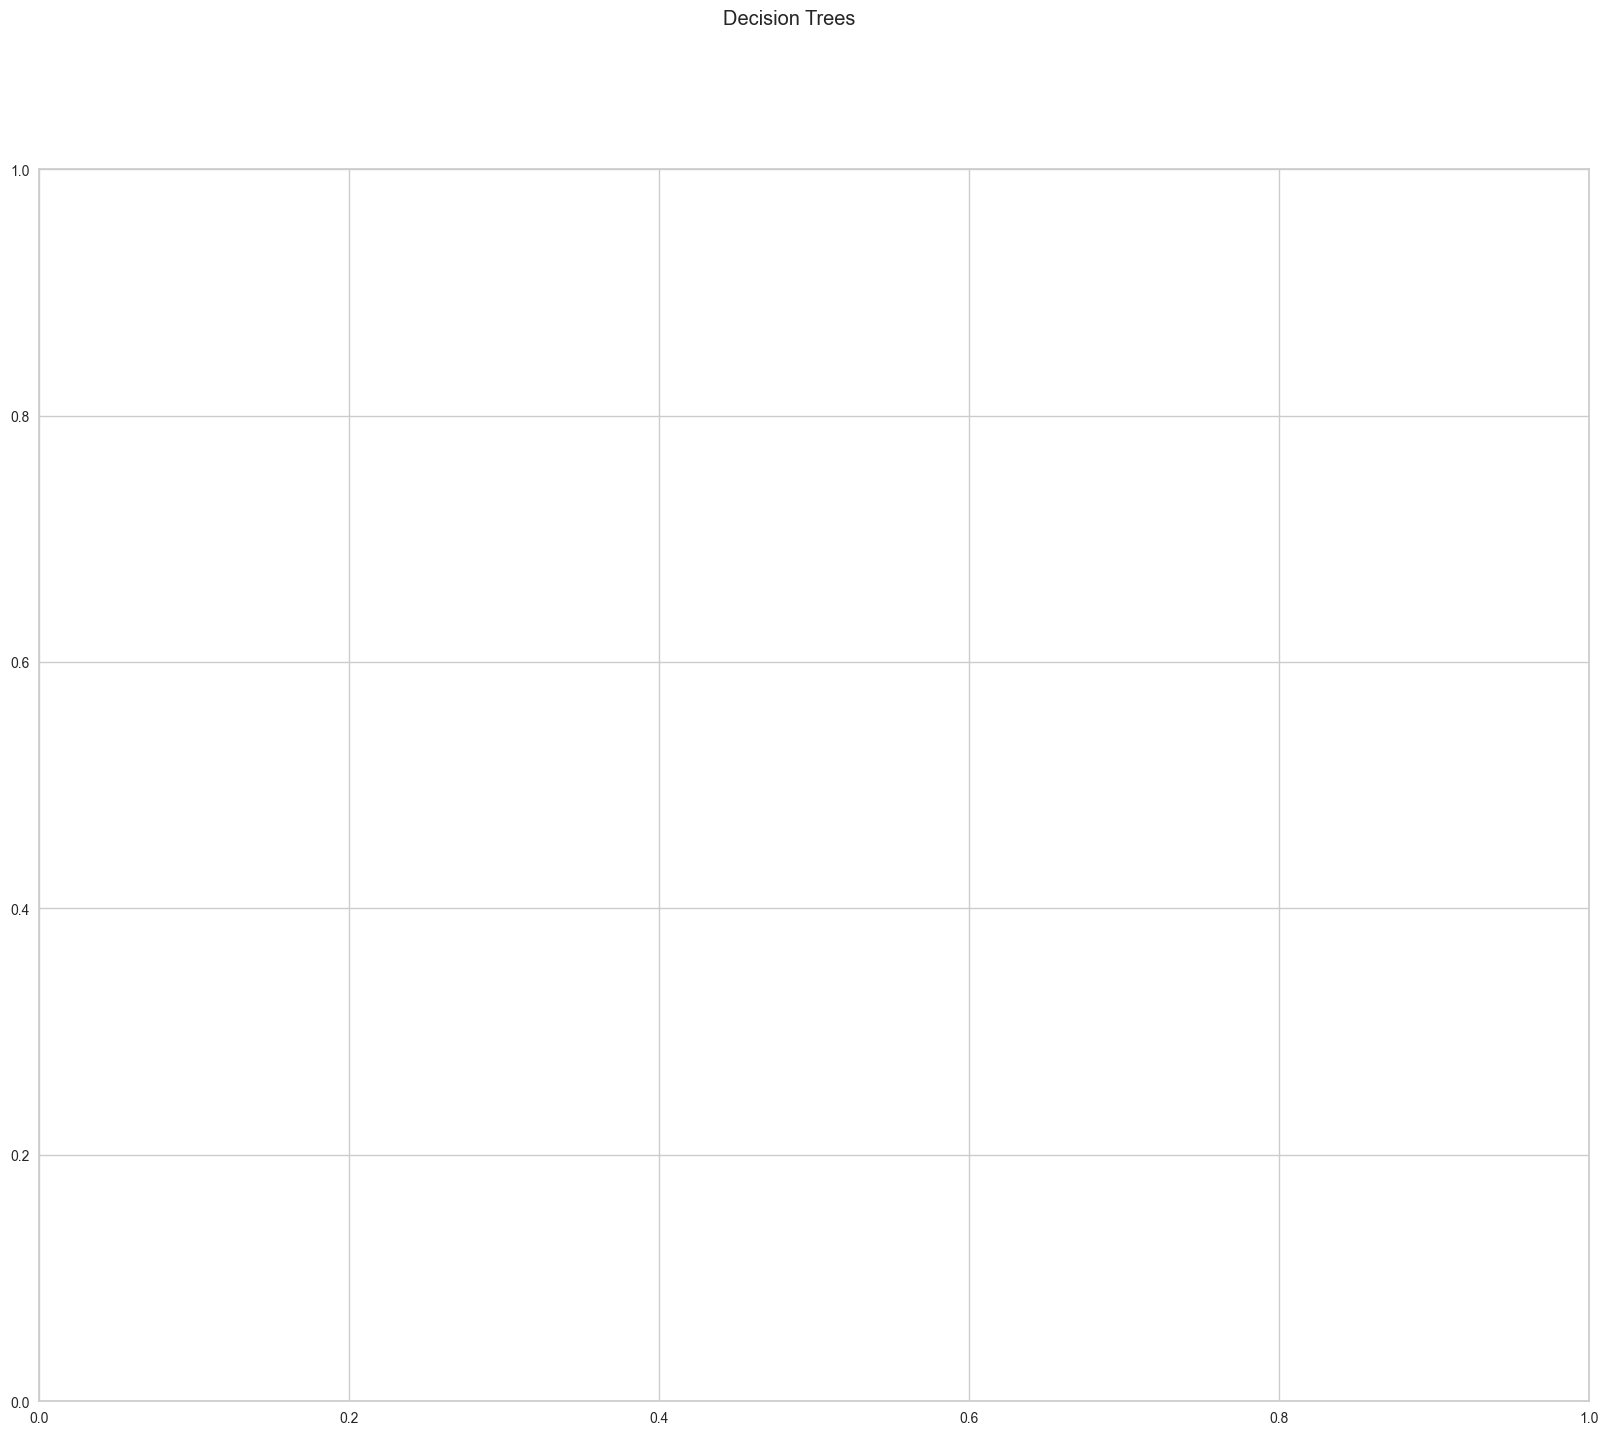

In [68]:
evaluate_model(dt_tuned_model)

# Model Finalization and Saving

We finalize the models and save them for future use.

In [69]:
rf_final_model = finalize_model(rf_tuned_model)
rf_final_model

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['dt', 'switch', 'src', 'dst',
                                             'pktcount', 'bytecount', 'dur',
                                             'dur_nsec', 'tot_dur', 'flows',
                                             'packetins', 'pktperflow',
                                             'byteperflow', 'pktrate',
                                             'Pairflow', 'Protocol', 'port_no',
                                             'tx_bytes', 'rx_bytes', 'tx_kbps',
                                             'rx_kbps', 'A1', 'A2',
                                             'tot_kbps'],
                                    transformer=Si...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='sqrt',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        monotonic_cst=None, n_estimators=100,
                                        n_jobs=-1, oob_score=False,
                                        random_state=123, verbose=0,
                                        warm_start=False))],
         verbose=False)

In [70]:
dt_final_model = finalize_model(dt_tuned_model)
dt_final_model

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['dt', 'switch', 'src', 'dst',
                                             'pktcount', 'bytecount', 'dur',
                                             'dur_nsec', 'tot_dur', 'flows',
                                             'packetins', 'pktperflow',
                                             'byteperflow', 'pktrate',
                                             'Pairflow', 'Protocol', 'port_no',
                                             'tx_bytes', 'rx_bytes', 'tx_kbps',
                                             'rx_kbps', 'A1', 'A2',
                                             'tot_kbps'],
                                    transformer=Si...
                                                                              random_state=123,
                                                                              sampling_strategy='auto')))),
                ('actual_estimator',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features=None, max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        monotonic_cst=None, random_state=123,
                                        splitter='best'))],
         verbose=False)

Save the model to a file

In [71]:
save_model(rf_final_model, 'rf_best_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['dt', 'switch', 'src', 'dst',
                                              'pktcount', 'bytecount', 'dur',
                                              'dur_nsec', 'tot_dur', 'flows',
                                              'packetins', 'pktperflow',
                                              'byteperflow', 'pktrate',
                                              'Pairflow', 'Protocol', 'port_no',
                                              'tx_bytes', 'rx_bytes', 'tx_kbps',
                                              'rx_kbps', 'A1', 'A2',
                                              'tot_kbps'],
                                     transformer=Si...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight=None, criterion='gini'

In [72]:
save_model(dt_final_model, 'dt_best_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['dt', 'switch', 'src', 'dst',
                                              'pktcount', 'bytecount', 'dur',
                                              'dur_nsec', 'tot_dur', 'flows',
                                              'packetins', 'pktperflow',
                                              'byteperflow', 'pktrate',
                                              'Pairflow', 'Protocol', 'port_no',
                                              'tx_bytes', 'rx_bytes', 'tx_kbps',
                                              'rx_kbps', 'A1', 'A2',
                                              'tot_kbps'],
                                     transformer=Si...
                                                                               random_state=123,
                                                   

# Analysis and Visualization of the Dataset

In [73]:
import matplotlib.pyplot as plt

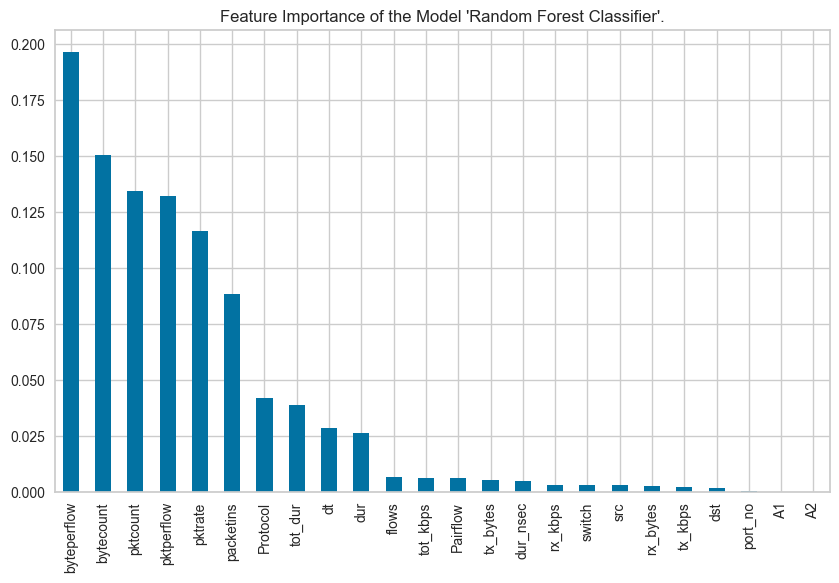

In [74]:
rf_importance = pd.Series(rf_final_model.feature_importances_, 
                       index=df.drop('label', axis=1).columns).sort_values(ascending=False)
rf_importance.plot(kind='bar', figsize=(10, 6))
plt.title("Feature Importance of the Model 'Random Forest Classifier'.")
plt.show()

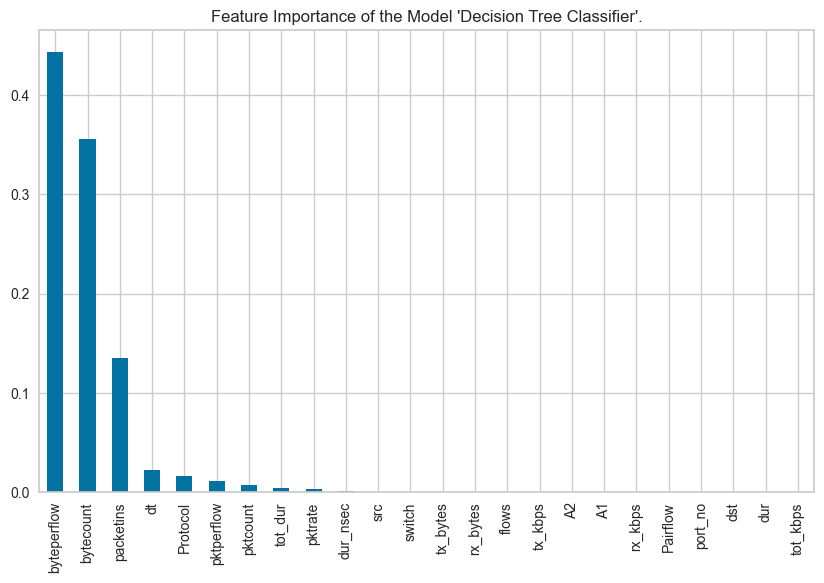

In [75]:
dt_importance = pd.Series(dt_final_model.feature_importances_, 
                       index=df.drop('label', axis=1).columns).sort_values(ascending=False)
dt_importance.plot(kind='bar', figsize=(10, 6))
plt.title("Feature Importance of the Model 'Decision Tree Classifier'.")
plt.show()

Use plot_model() to visualize model performance metrics such as the confusion matrix.

In [76]:
from pycaret.classification import plot_model

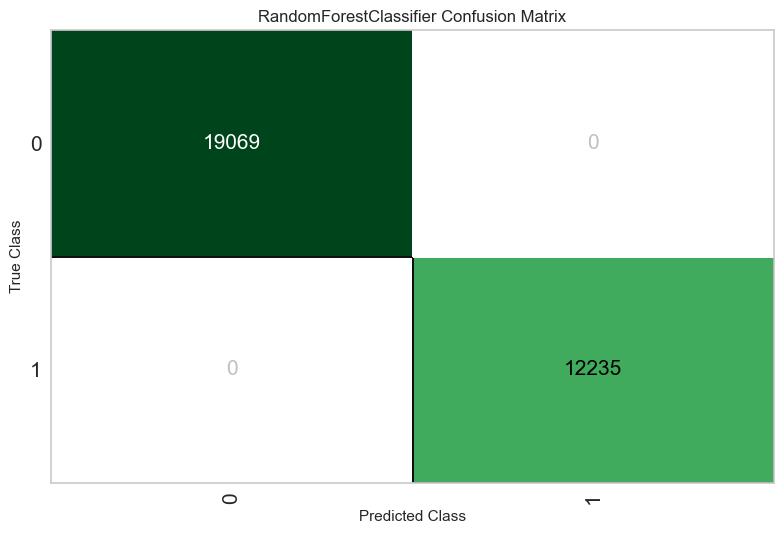

In [77]:
plot_model(rf_final_model, plot='confusion_matrix')

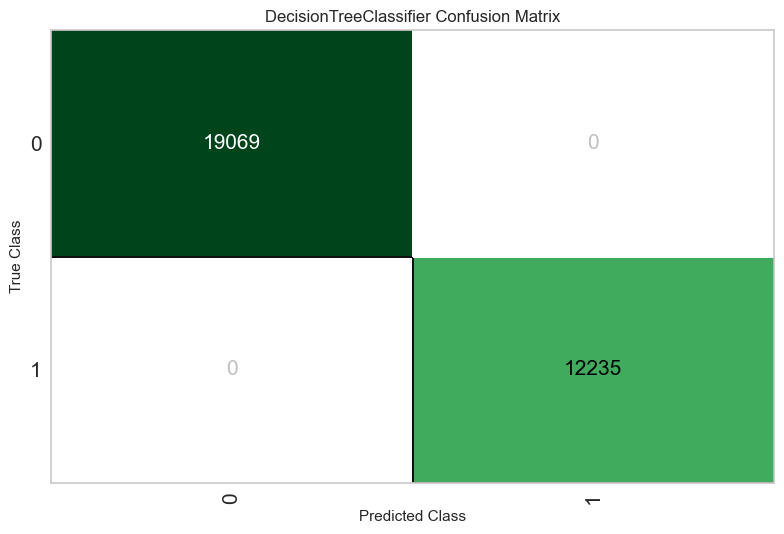

In [78]:
plot_model(dt_final_model, plot='confusion_matrix')

# Model Testing

Load the model later for predictions

In [79]:
rf_loaded_model = load_model('rf_best_model')
rf_loaded_model

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=C:\Users\CENTER~1\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['dt', 'switch', 'src', 'dst',
                                             'pktcount', 'bytecount', 'dur',
                                             'dur_nsec', 'tot_dur', 'flows',
                                             'packetins', 'pktperflow',
                                             'byteperflow', 'pktrate',
                                             'Pairflow', 'Protocol', 'port_no',
                                             'tx_bytes', 'rx_bytes', 'tx_kbps',
                                             'rx...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='sqrt',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        monotonic_cst=None, n_estimators=100,
                                        n_jobs=-1, oob_score=False,
                                        random_state=123, verbose=0,
                                        warm_start=False))],
         verbose=False)

In [80]:
dt_loaded_model = load_model('dt_best_model')
dt_loaded_model

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=C:\Users\CENTER~1\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['dt', 'switch', 'src', 'dst',
                                             'pktcount', 'bytecount', 'dur',
                                             'dur_nsec', 'tot_dur', 'flows',
                                             'packetins', 'pktperflow',
                                             'byteperflow', 'pktrate',
                                             'Pairflow', 'Protocol', 'port_no',
                                             'tx_bytes', 'rx_bytes', 'tx_kbps',
                                             'rx...
                                                                              random_state=123,
                                                                              sampling_strategy='auto')))),
                ('actual_estimator',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features=None, max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        monotonic_cst=None, random_state=123,
                                        splitter='best'))],
         verbose=False)

In [81]:
rf_predictions = predict_model(rf_loaded_model, data=X_test)
rf_predictions.head()

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,A1,A2,tot_kbps,prediction_label,prediction_score
98619,3129,5,167772172,167772165,34466,36740756,73,336000000,7.333600e+10,3,...,1,4246,37285812,0,3838.0,0,0,3838.0,0,1.0
87238,11575,3,167772173,167772168,93745,97682290,300,886000000,3.010000e+11,4,...,4,3735,3413,0,0.0,0,0,0.0,1,1.0
43763,12115,3,167772165,167772168,76818,81887988,170,681000000,1.710000e+11,3,...,2,4709,279386824,0,0.0,0,0,0.0,0,1.0
42868,6918,1,167772161,167772167,23072,26474280,54,310000000,5.431000e+10,3,...,2,3146,1192,0,0.0,0,0,0.0,0,1.0
33546,7572,5,167772176,167772169,929,91042,951,467000000,9.510000e+11,5,...,2,5701,1542,0,0.0,0,0,0.0,0,1.0


In [82]:
dt_predictions = predict_model(dt_loaded_model, data=X_test)
dt_predictions.head()

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,A1,A2,tot_kbps,prediction_label,prediction_score
98619,3129,5,167772172,167772165,34466,36740756,73,336000000,7.333600e+10,3,...,1,4246,37285812,0,3838.0,0,0,3838.0,0,1.0
87238,11575,3,167772173,167772168,93745,97682290,300,886000000,3.010000e+11,4,...,4,3735,3413,0,0.0,0,0,0.0,1,1.0
43763,12115,3,167772165,167772168,76818,81887988,170,681000000,1.710000e+11,3,...,2,4709,279386824,0,0.0,0,0,0.0,0,1.0
42868,6918,1,167772161,167772167,23072,26474280,54,310000000,5.431000e+10,3,...,2,3146,1192,0,0.0,0,0,0.0,0,1.0
33546,7572,5,167772176,167772169,929,91042,951,467000000,9.510000e+11,5,...,2,5701,1542,0,0.0,0,0,0.0,0,1.0


In [83]:
rf_predictions['prediction_score'].value_counts()

prediction_score
1.00    19940
0.99      617
0.98      167
0.97       56
0.96       30
0.95       22
0.93        9
0.94        7
0.92        7
0.91        6
0.87        2
0.86        2
0.90        2
0.89        1
0.85        1
Name: count, dtype: int64

# Fernet algorithm

Implement a Fernet for encrypting and decrypting of dataset using the trained models are random forest and decision tree

Fernet is a symmetric encryption algorithm provided by the `cryptography` library in Python. 

It is designed to provide strong encryption for data. Fernet guarantees that data encrypted using it cannot be manipulated or read without the key. This algorithm uses AES (Advanced Encryption Standard) in CBC (Cipher Block Chaining) mode with a 128-bit key for encryption, and it includes HMAC (Hash-based Message Authentication Code) with SHA256 for message integrity.

Here’s a brief overview of how Fernet works:

1. **Key Generation**: 
    - A key is generated which will be used for both encryption and decryption.

2. **Encryption**: 
    - Data is encrypted using this key. The encrypted data includes the IV (Initialization Vector), the ciphertext, and an HMAC signature to ensure integrity.
    
3. **Decryption**: 
    - The same key is used to decrypt the data. The HMAC is checked to ensure that the data has not been tampered with.

### Key Features of Fernet

- **Symmetric Encryption**: 
    - The same key is used for both encryption and decryption.

- **AES-128**: 
    - Uses AES with a 128-bit key in CBC mode for encryption.

- **HMAC with SHA256**: 
    - Ensures the integrity of the encrypted data.

- **Base64 Encoding**: 
    - The output is base64-encoded, making it easy to store and transmit.

### Summary

- **Fernet** is a symmetric encryption algorithm that uses AES and HMAC for secure encryption and integrity verification.
- It is easy to use for encrypting and decrypting both text and numerical data.
- Ensure you securely store the encryption key, as it is required for both encryption and decryption processes.

Install the `cryptography` library and import Fernet algorithm

In [97]:
# !pip install cryptography
from cryptography.fernet import Fernet
key = Fernet.generate_key()

In [98]:
def encrypt_decrypt_data(data, key, mode='encrypt'):
    """
    Encrypts or decrypts the given numerical data using the Fernet algorithm.

    Args:
    - data (pandas.DataFrame): The dataset containing numerical data.
    - key (bytes): The key for encryption and decryption.
    - mode (str): The mode of operation, either 'encrypt' or 'decrypt'. Default is 'encrypt'.

    Returns:
    - processed_data (pandas.DataFrame): Encrypted or decrypted dataset.
    """
    # Initialize the Fernet cipher suite with the provided key
    cipher_suite = Fernet(key)

    copied_data = data.copy()

    if mode == 'encrypt':
        for col in copied_data.select_dtypes(include='number'):
            copied_data[col] = copied_data[col].apply(lambda x: cipher_suite.encrypt(str(x).encode('utf-8')))

    elif mode == 'decrypt':
        for col in copied_data.select_dtypes(include='object'):
            copied_data[col] = copied_data[col].apply(lambda x: float(cipher_suite.decrypt(x).decode('utf-8')))

    return copied_data

Applying Fernet Encryption to Numerical Dataset

In [99]:
encrypted_df = encrypt_decrypt_data(df, key, mode='encrypt')
encrypted_df.head()

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,A1,A2,tot_kbps,label
0,b'gAAAAABmTqF8jbKBkPU7BAc1Z5Aamll8Rez1JK7r9-Cn...,b'gAAAAABmTqGElTjuBEDG4Lylv1Wa5Vkz4qcRzBwViPoO...,b'gAAAAABmTqGL46QXTcT4vw2uC8kobHQICdBjbJTLnHqD...,b'gAAAAABmTqGRza0w3ttcf5qujW1_4ztYmFDvaBEaT7e8...,b'gAAAAABmTqGXnnsXfFQC5BmAaHX-GMkNFU7sZOqytyHD...,b'gAAAAABmTqGe_7MghvwIdKzO0oYH68O-fnYO4H4T9amM...,b'gAAAAABmTqGkRdxr3EFJTznvFPWDYgVULqKt3zG0GEzn...,b'gAAAAABmTqGrjwu-Dm3912j3jqqZSuI075Gf05muh5bL...,b'gAAAAABmTqGxXJpYgMEIZYEv20ik1DLihN1YT8WVryHr...,b'gAAAAABmTqG3Ay8CwH04dz_1v2hQqhf_N-9U3_EqGXaa...,...,b'gAAAAABmTqHd0wy_RBH3xPt624ShHZscjyfUof0prKh3...,b'gAAAAABmTqHjmC4YSpafDyaf-R6jRlMmThpBFG8K700w...,b'gAAAAABmTqHpb-70JcKIkZLioSPoG0G5nVTEYNAb5mn4...,b'gAAAAABmTqHvoC5X3neXLZ6f3WsnEgwJYpr1rT1XocHg...,b'gAAAAABmTqH2eKY48tyzCdoiQrHPpy4HIVDGdSCggUMr...,b'gAAAAABmTqH8RFRnIgLrmxD6-6KO_il9HW43s3VwF2Ph...,b'gAAAAABmTqIEINlTbccOjH5-AHN7BZYq9aqH05-WMOkX...,b'gAAAAABmTqIK9z5GEEfzXsrOyVo4DkRcJbsOZhFDRpxp...,b'gAAAAABmTqIQRY9Ph0ntpq78eIaxMO5AMG6UXNLgzq46...,b'gAAAAABmTqIXblb80klb0nyiXehyuMtvO3fCMc1N1C-Q...
1,b'gAAAAABmTqF8AnDiMUeLPFJOgE4sqWFk6ZCRpup43ssy...,b'gAAAAABmTqGEovGBmpByU7-oX7aMHvHpWQk4J6_I0U6S...,b'gAAAAABmTqGL35Kpp1PlC2oBHpWaO2wRqwpcprtEenju...,b'gAAAAABmTqGRrjh13qpTYu-1bVrOlj2DyUPaF4PAjwxS...,b'gAAAAABmTqGXHxlIcndfECfKhahHMMR2-yvWAUBpovTo...,b'gAAAAABmTqGe-ssPSDsF0iP3HHAGB24KL9X8O4WG65jo...,b'gAAAAABmTqGkn0NaR09JCIyi25L9_HvuM_bqS7tNJ7cF...,b'gAAAAABmTqGr7lfJTxUxZG9aRfle5iK2yWUaAhaR8g1H...,b'gAAAAABmTqGxef60sDeHowOOB1SNKbGVUKwkXKOR-BXJ...,b'gAAAAABmTqG3-mLZHQUhlNQTPPvtRZ-5oEoyGmasx_tp...,...,b'gAAAAABmTqHdftJFerQU8cPcNeRYdMf8zby9K1n0dGBT...,b'gAAAAABmTqHjvgBYDHUTb6ubo3-CpcJI6LPFMU0oC0K7...,b'gAAAAABmTqHpSzb-r60IrCCV69J2_Cig9UN7rOP3Scrk...,b'gAAAAABmTqHvtzxC1Ie_WS1ICpaSaxY-8PCx-_0TSKhL...,b'gAAAAABmTqH2n8xq8UUnIk5ugZldRwccz35kK22cQq5H...,b'gAAAAABmTqH881CqSryt6Nzuk9zMOFyv5DmfLAT7CGdR...,b'gAAAAABmTqIEYOyOzx8-fTM0wddJFpsJOmYrzskG859c...,b'gAAAAABmTqIKE-VPUYv31UouHSK5Wl-9uuCtCHly83lU...,b'gAAAAABmTqIQ8NGcw7q_eM0DLJLyrxjVFoT3NPZiklgp...,b'gAAAAABmTqIXbm2U8Zd9GD6YJS6awet9GvOjkwTR3W91...
2,b'gAAAAABmTqF89fG3WO9BBwmGEiziVEjBxyLx_u1mztzG...,b'gAAAAABmTqGE0GrqDsToj7w9Mv8ZP_z1BPF_-qGlgPWF...,b'gAAAAABmTqGLmsiu-UEV_XjxgPYhmcaPPZDKLkzTjHGj...,b'gAAAAABmTqGRM9hDhPhiftsq0dn4QFL_4FfN2-xiBMbb...,b'gAAAAABmTqGXFpkPAuD9BtZKWvnBEqXJA61iPnjlsEo6...,b'gAAAAABmTqGedQWpu00awBcQkHep1slRj0H7OzyXW29u...,b'gAAAAABmTqGkrBzzI4Ws45hAJna-X5tT8vwc5EG7WRBv...,b'gAAAAABmTqGrX-uJFJTbMv_2ALk_CRSRaHLDAitWsL7e...,b'gAAAAABmTqGxjlS92OqnXrJHu9V8HlrQ_BCKxOuby9Zn...,b'gAAAAABmTqG3kMCf-dfBB5_4EGnd7YmI32ja-7_-R-xP...,...,b'gAAAAABmTqHdmo6qC7O4A_r5U2_2Tskhi_lALXz6U1m2...,b'gAAAAABmTqHjWEdMc4RYrVYlhLUaICtrITWbl2MzlMgt...,b'gAAAAABmTqHpIhF_ffdTS4B3MMt5CgCLAtaewcIxF1p-...,b'gAAAAABmTqHvfIhyKPsM5X9KPyJwZCoNPKLn9xqUVLVH...,b'gAAAAABmTqH2TnLFnG4WcK7-q5eEFitYJXqsDcSgHW0L...,b'gAAAAABmTqH8lpXHVLme467AR4Hroo9Hy84mGChYPkMp...,b'gAAAAABmTqIEITrZnImw0ZfltrqYxdIx_9cdZQrqrdWR...,b'gAAAAABmTqIKky9vbeHuuBUnlADWmVrbzO8VRA3lOOPO...,b'gAAAAABmTqIQmemvYJlAR2dVZ2ZZqoaJvubAGgApXvRF...,b'gAAAAABmTqIXRX9a3gxCAusSCRwf4suuNVmYuP9Dzk12...
3,b'gAAAAABmTqF8biUCpz9wI1C7WXIPf0wB9RZo3ks3yH6l...,b'gAAAAABmTqGEQS_a2ubiIiUybHjLflbpMPDVsJo1JP_g...,b'gAAAAABmTqGLm6bRM11NICVl8_KvNzETTWKLovPefSba...,b'gAAAAABmTqGRBTytQZ0oR7KBQL8IXdgG1KbsRZSmrSjp...,b'gAAAAABmTqGXwCsJPZHqkyazZ4LXdnX66DQLuZXL2rVU...,b'gAAAAABmTqGeGPjr1zBuho2EAU_s-kxDR82ZtoOfmytG...,b'gAAAAABmTqGk1zRL4p6G65ccmsbV0F2DVOFjp8mI6XlV...,b'gAAAAABmTqGrluqiH0QfZOpoPxPFRpSO0fZs9TMWa8D6...,b'gAAAAABmTqGxJni4YsHyrb2ZZPc00ZnrloO72tzxlG84...,b'gAAAAABmTqG32YPAfNJmmC0jenQCnXo1bI0BrHTMAXww...,...,b'gAAAAABmTqHd6ApuZkZSx-1Hfvhj3a17tKhzZ6XlMmSN...,b'gAAAAABmTqHjH3JHA3xJY50kiOFR95dWBzQ2l-L543o3...,b'gAAAAABmTqHpcu34GEHglShI36PZ9zsEX3uUJVbqvG8u...,b'gAAAAABmTqHvCMcoeWb92lrCLRG8vacczhq1cjT8vA4A...,b'gAAAAABmTqH26HZ9GWv78IlDT2V2TDYKrU4lbe4dK1aY...,b'gAAAAABmTqH8DQaS8Uz-n0kaq2oR9VB6szar-rKMbzQi...,b'gAAAAABmTqIEOJLVKZ5gZtJuRIULYP9rQ

Applying Fernet Decryption to Numerical Dataset

In [100]:
decrypted_df = encrypt_decrypt_data(encrypted_df, key, mode='decrypt')
decrypted_df.head()

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,A1,A2,tot_kbps,label
0,10086.0,2.0,167772161.0,167772167.0,113850.0,121364100.0,252.0,911000000.0,2.530000e+11,3.0,...,1.0,2.0,4221.0,243018786.0,0.0,2601.0,0.0,0.0,2601.0,0.0
1,11575.0,4.0,167772173.0,167772168.0,93742.0,97679164.0,300.0,869000000.0,3.010000e+11,5.0,...,1.0,4.0,3735.0,3413.0,0.0,0.0,0.0,0.0,0.0,1.0
2,11485.0,4.0,167772180.0,167772168.0,97480.0,101574160.0,310.0,754000000.0,3.110000e+11,6.0,...,1.0,1.0,3795.0,1242.0,0.0,0.0,0.0,0.0,0.0,1.0
3,31993.0,7.0,167772161.0,167772175.0,129224.0,7494992.0,499.0,778000000.0,5.000000e+11,3.0,...,8.0,3.0,457026091.0,34127977.0,52.0,56.0,0.0,0.0,108.0,0.0
4,7057.0,4.0,167772167.0,167772161.0,86142.0,5686080.0,294.0,316000000.0,2.940000e+11,11.0,...,8.0,4.0,8839901.0,119929163.0,407.0,3751.0,0.0,0.0,4158.0,1.0


original dataset

In [101]:
df.head()

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,A1,A2,tot_kbps,label
0,10086,2,167772161,167772167,113850,121364100,252,911000000,2.530000e+11,3,...,1,2,4221,243018786,0,2601.0,0,0,2601.0,0
1,11575,4,167772173,167772168,93742,97679164,300,869000000,3.010000e+11,5,...,1,4,3735,3413,0,0.0,0,0,0.0,1
2,11485,4,167772180,167772168,97480,101574160,310,754000000,3.110000e+11,6,...,1,1,3795,1242,0,0.0,0,0,0.0,1
3,31993,7,167772161,167772175,129224,7494992,499,778000000,5.000000e+11,3,...,8,3,457026091,34127977,52,56.0,0,0,108.0,0
4,7057,4,167772167,167772161,86142,5686080,294,316000000,2.940000e+11,11,...,8,4,8839901,119929163,407,3751.0,0,0,4158.0,1
